## LOAD DATASET


In [6]:
import pandas as pd
data = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final).csv')

#  add new column and set value to category of label column, produk = 0, layanan pelanggan= 1, pengiriman = 2
cat_code = {'Produk': 0, 'Layanan Pelanggan': 1, 'Pengiriman': 2}
data['category_id'] = data['label'].map(cat_code)
data


,text,label,category_id
0,Cepat sampaiiiiiiiiiiiiiiiiiiiiiiiiii,Pengiriman,2
1,Fast response recommended seller,Layanan Pelanggan,1
2,Barang bagus tapi analog kiri sama kanan kalo ...,Produk,0
3,keren gan Produknya buat main games,Produk,0
4,mantap gan!!!!!.Barang bagus juga,Produk,0
...,...,...,...
1019,gak nyangaka keren banget jamnya hi hi,Produk,0
1020,Pengiriman sangat cepat. Terima kasih,Pengiriman,2
1021,Pesan + bayar tgl. 07 Sep 18 jam 2 siang. Bara...,Layanan Pelanggan,1
1022,Packingnya keren rapi dan aman pakai bubble wr...,Layanan Pelanggan,1


### EDA


In [7]:
data.groupby('label').size()

label
Layanan Pelanggan    329
Pengiriman           172
Produk               523
dtype: int64

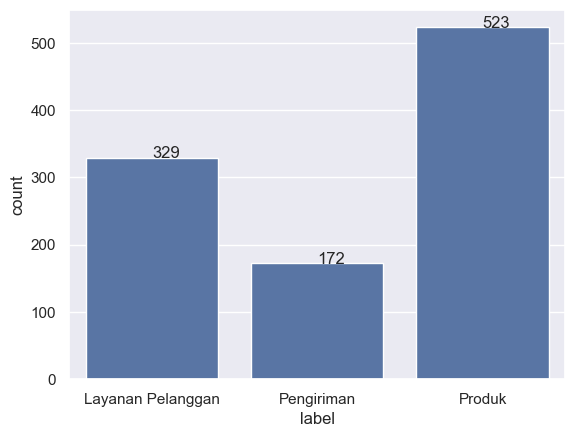

In [8]:
# do EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
# add exact number on top of bar
datagroup = data.groupby('label').size()
for index, value in enumerate(datagroup):
    plt.text(index, value, str(value))
ax = sns.countplot(x="label", data=data, order=datagroup.index)
plt.show()



### Upsampling


In [9]:
# do sampling
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data[data.category_id==0]
df_minority_layanan = data[data.category_id==1]
df_minority_pengiriman = data[data.category_id==2]

# Upsample minority class
df_minority_upsampled_layanan = resample(df_minority_layanan, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # to match majority class
                                 random_state=123) # reproducible results

df_minority_upsampled_pengiriman = resample(df_minority_pengiriman,
                                    replace=True,     # sample with replacement
                                    n_samples=df_majority.shape[0],    # to match majority class
                                    random_state=123) # reproducible results
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled_layanan, df_minority_upsampled_pengiriman])
# shuffle data
data = data.sample(frac=1).reset_index(drop=True)




In [10]:
data.groupby('label').size()

label
Layanan Pelanggan    523
Pengiriman           523
Produk               523
dtype: int64

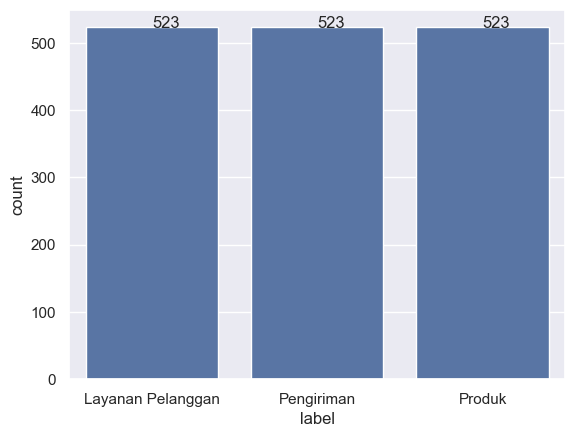

In [11]:
sns.set(style="darkgrid")
# add exact number on top of bar
datagroup = data.groupby('label').size()
for index, value in enumerate(datagroup):
    plt.text(index, value, str(value))
ax = sns.countplot(x="label", data=data, order=datagroup.index)
plt.show()

In [12]:
#  save to csv
# data.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled.csv', index=False)


In [13]:
# load scv again
data = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled.csv')
data.head()

,text,label,category_id
0,Pelayanan ok barang ok berfungsi baik thanks,Layanan Pelanggan,1
1,Barang oke pelayanan juga oke banget thanks su...,Layanan Pelanggan,1
2,Sudah ditest dan semua berjalan dengan baik.,Produk,0
3,Kualitas baik Pengiriman cepat fast respond,Pengiriman,2
4,Pengiriman cepat barang ok dan berfungsi denga...,Pengiriman,2


# PREPROCESSING


## Cleaning


In [14]:
import preprocessing as pre

# data_clean = data.text.apply(pre.preprocess)
# data_clean.head()

In [15]:
# save to csv
# data_clean.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean.csv', index=False)

In [16]:
# load scv again
data_clean = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean.csv')
data_clean.head()

,text
0,layan ok barang ok fungsi baik thanks
1,barang oke layan oke banget thanks sukses teru...
2,ditest jalan baik
3,kualitas baik kirim cepat fast respond
4,kirim cepat barang ok fungsi baik tiba tempat ...


After doing preprocess, i will split the data into train set and test set. After that, i will save the data into different csv file. So ican use it later with seamlessly without run again the preprocess from the beginning.


## Splitting

1. Ratio 90 : 10
2. Ratio 80 : 20
3. Ratio 70 : 30


In [17]:
# 90 : 10

#  shuffle with same ratio for each category
from sklearn.model_selection import train_test_split

X_train_90, X_test_90, y_train_90, y_test_90 = train_test_split(data_clean, data.category_id, test_size=0.1, random_state=42, stratify=data.category_id)
X_train_80, X_test_80, y_train_80, y_test_80 = train_test_split(data_clean, data.category_id, test_size=0.2, random_state=42, stratify=data.category_id)
X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(data_clean, data.category_id, test_size=0.3, random_state=42, stratify=data.category_id)


In [18]:
print("90 : 10")
print("X_train", X_train_90.shape)
print("X_test", X_test_90.shape)
print("y_train", y_train_90.shape)
print("y_test", y_test_90.shape)

print("80 : 20")
print("X_train", X_train_80.shape)
print("X_test", X_test_80.shape)
print("y_train", y_train_80.shape)
print("y_test", y_test_80.shape)

print("70 : 30")
print("X_train", X_train_70.shape)
print("X_test", X_test_70.shape)
print("y_train", y_train_70.shape)
print("y_test", y_test_70.shape)


90 : 10
X_train (1412, 1)
X_test (157, 1)
y_train (1412,)
y_test (157,)
80 : 20
X_train (1255, 1)
X_test (314, 1)
y_train (1255,)
y_test (314,)
70 : 30
X_train (1098, 1)
X_test (471, 1)
y_train (1098,)
y_test (471,)


In [41]:
df_join_train_90 = pd.concat([X_train_90, y_train_90], axis=1)
df_join_train_80 = pd.concat([X_train_80, y_train_80], axis=1)
df_join_train_70 = pd.concat([X_train_70, y_train_70], axis=1)

df_join_test_90 = pd.concat([X_test_90, y_test_90], axis=1)
df_join_test_80 = pd.concat([X_test_80, y_test_80], axis=1)
df_join_test_70 = pd.concat([X_test_70, y_test_70], axis=1)

# add category column
df_join_train_90['label'] = df_join_train_90['category_id'].map({0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'})
df_join_train_80['label'] = df_join_train_80['category_id'].map({0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'})
df_join_train_70['label'] = df_join_train_70['category_id'].map({0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'})

df_join_test_90['label'] = df_join_test_90['category_id'].map({0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'})
df_join_test_80['label'] = df_join_test_80['category_id'].map({0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'})
df_join_test_70['label'] = df_join_test_70['category_id'].map({0: 'Produk', 1: 'Layanan Pelanggan', 2: 'Pengiriman'})

# save to csv
# df_join_train_90.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 90 - Train.csv', index=False)
# df_join_train_80.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Train.csv', index=False)
# df_join_train_70.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 70 - Train.csv', index=False)

# df_join_test_90.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 90 - Test.csv', index=False)
# df_join_test_80.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Test.csv', index=False)
# df_join_test_70.to_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 70 - Test.csv', index=False)


In [42]:
# load scv again
df_join_train_90 = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 90 - Train.csv')
df_join_train_80 = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Train.csv')
df_join_train_70 = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 70 - Train.csv')

df_join_test_90 = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 90 - Test.csv')
df_join_test_80 = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Test.csv')
df_join_test_70 = pd.read_csv('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 70 - Test.csv')



In [43]:
df_join_train_70.head()

,text,category_id,label
0,barang sesuai guna baik,0,Produk
1,produk kirim beda pics pics warna strap hitam ...,0,Produk
2,barang terima baik kirim cepat barang sesuai p...,2,Pengiriman
3,makas sesuai pesan jam nyata ya,0,Produk
4,fast respon kirim cepat,1,Layanan Pelanggan


## TFIDF


In [80]:
import tfidf as tfidf
import pickle

# 90 : 10
tfidf_model_90 = tfidf.TFIDF(df_join_train_90.text) # init tfidf model with train data
df_tfidf_train_90 = df_join_train_90 
df_tfidf_train_90['tfidf'] = df_join_train_90.text.apply(tfidf_model_90.transform) # get tfidf value for each word in train data
df_tfidf_test_90 = df_join_test_90
df_tfidf_test_90['tfidf'] = df_join_test_90.text.apply(tfidf_model_90.transform) # get tfidf value for each word in test data

# save to pickle
# with open('../../Dataset/TFIDF Model - 90.pkl', 'wb') as f:
#     pickle.dump(tfidf_model_90, f, pickle.HIGHEST_PROTOCOL)

# with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 90 - Train - TFIDF.pkl', 'wb') as f:
#     pickle.dump(df_tfidf_train_90, f, pickle.HIGHEST_PROTOCOL)

# with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 90 - Test - TFIDF.pkl', 'wb') as f:
#     pickle.dump(df_tfidf_test_90, f, pickle.HIGHEST_PROTOCOL)


In [81]:
# 80 : 20
tfidf_model_80 = tfidf.TFIDF(df_join_train_80.text) # init tfidf model with train data
df_tfidf_train_80 = df_join_train_80
df_tfidf_train_80['tfidf'] = df_join_train_80.text.apply(tfidf_model_80.transform) # get tfidf value for each word in train data
df_tfidf_test_80 = df_join_test_80
df_tfidf_test_80['tfidf'] = df_join_test_80.text.apply(tfidf_model_80.transform) # get tfidf value for each word in test data

# save to pickle
# with open('../../Dataset/TFIDF Model - 80.pkl', 'wb') as f:
#     pickle.dump(tfidf_model_80, f, pickle.HIGHEST_PROTOCOL)

# with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Train - TFIDF.pkl', 'wb') as f:
#     pickle.dump(df_tfidf_train_80, f, pickle.HIGHEST_PROTOCOL)

# with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 80 - Test - TFIDF.pkl', 'wb') as f:
#     pickle.dump(df_tfidf_test_80, f, pickle.HIGHEST_PROTOCOL)


In [82]:
# 70 : 30
tfidf_model_70 = tfidf.TFIDF(df_join_train_70.text) # init tfidf model with train data
df_tfidf_train_70 = df_join_train_70
df_tfidf_train_70['tfidf'] = df_join_train_70.text.apply(tfidf_model_70.transform) # get tfidf value for each word in train data
df_tfidf_test_70 = df_join_test_70
df_tfidf_test_70['tfidf'] = df_join_test_70.text.apply(tfidf_model_70.transform) # get tfidf value for each word in test data

# save to pickle
# with open('../../Dataset/TFIDF Model - 70.pkl', 'wb') as f:
#     pickle.dump(tfidf_model_70, f, pickle.HIGHEST_PROTOCOL)

# with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 70 - Train - TFIDF.pkl', 'wb') as f:
#     pickle.dump(df_tfidf_train_70, f, pickle.HIGHEST_PROTOCOL)

# with open('../../Dataset/Dataset Skripsi - Fix Dataset (Final) - Upsampled - Clean - 70 - Test - TFIDF.pkl', 'wb') as f:
#     pickle.dump(df_tfidf_test_70, f, pickle.HIGHEST_PROTOCOL)